In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [2]:

data = pd.read_csv('data.csv')
head = data.head(5)
head
head['rain_sum (mm)'].mean()

15.419999999999998

In [3]:
# saving xlsx file
# GFG = pd.ExcelWriter('data_5.xlsx')
# head.to_excel(GFG, index=False)

# GFG.save()

C:\Users\auriw\AppData\Local\Temp\ipykernel_3564\762579008.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  GFG.save()


<Axes: xlabel='time', ylabel='rain_sum (mm)'>

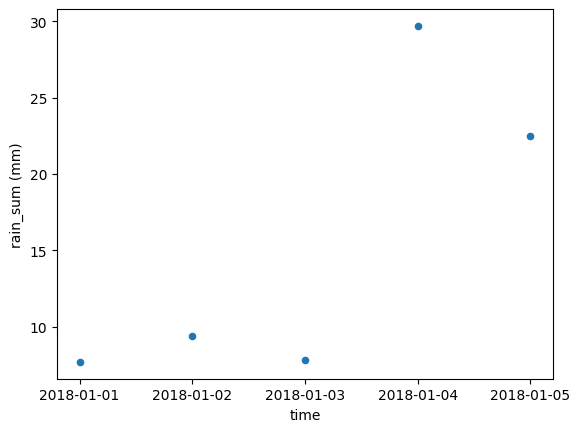

In [4]:
head.plot.scatter(x='time', y='rain_sum (mm)')

In [5]:
head.sort_values(by=['time'], inplace=True, ascending=True)
head.set_index('time', inplace= True)

C:\Users\auriw\AppData\Local\Temp\ipykernel_3564\863227578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head.sort_values(by=['time'], inplace=True, ascending=True)


In [6]:
head.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018-01-01 to 2018-01-05
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature_2m_max (°C)          5 non-null      float64
 1   temperature_2m_min (°C)          5 non-null      float64
 2   apparent_temperature_max (°C)    5 non-null      float64
 3   apparent_temperature_min (°C)    5 non-null      float64
 4   sunrise (iso8601)                5 non-null      object 
 5   sunset (iso8601)                 5 non-null      object 
 6   shortwave_radiation_sum (MJ/m²)  5 non-null      float64
 7   rain_sum (mm)                    5 non-null      float64
 8   snowfall_sum (cm)                5 non-null      float64
 9   windspeed_10m_max (km/h)         5 non-null      float64
 10  windgusts_10m_max (km/h)         5 non-null      float64
 11  winddirection_10m_dominant (°)   5 non-null      float64
 12  et0_fao_evapo

In [7]:
head = head.drop(head.columns[[4, 5, 8, 13, 14]], axis=1)
head

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
time,,,,,,,,,,
2018-01-01,29.9,26.0,36.3,31.6,17.59,7.7,6.9,20.2,277.0,3.61
2018-01-02,30.6,25.7,37.7,31.2,19.87,9.4,7.1,18.0,168.0,4.11
2018-01-03,31.8,25.9,40.3,31.7,20.44,7.8,8.1,21.2,125.0,4.23
2018-01-04,30.8,26.0,39.1,31.6,20.44,29.7,7.2,21.6,190.0,4.22
2018-01-05,30.9,25.2,37.6,29.9,20.10,22.5,6.9,21.2,241.0,4.16


In [8]:
X = head.drop(['rain_sum (mm)'], axis=1)

In [9]:
y = head['rain_sum (mm)']

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2,random_state = 100)

In [11]:

train_target = pd.DataFrame(y_train)
train_target.mean()

rain_sum (mm)    16.925
dtype: float64

In [12]:
from scipy.stats import uniform, randint
params = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 12),
    'learning_rate': uniform(0.01, 0.3)
    }

In [13]:
xgb_model_new = xgb.XGBRegressor()
search = RandomizedSearchCV(
    xgb_model_new, 
    params,
    n_iter=100,
    cv=2,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014BD4DDB7D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014BD54B96D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014BD4DF3E10>},
                   scoring='neg_root_mean_squared_error')

In [14]:
# Print the best hyperparameters and mean squared error
print("Best hyperparameters: ", search.best_params_)
print("RMSE: ", -search.best_score_)

Best hyperparameters:  {'learning_rate': 0.013179854975075013, 'max_depth': 5, 'n_estimators': 175}
RMSE:  10.298503374753885


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Train and evaluate the model with best hyperparameters on the validation set
best_xgb_model = xgb.XGBRegressor(**search.best_params_)
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("test RMSE: ", np.sqrt(mse))

test RMSE:  9.759000396728515


In [16]:
data_train = pd.DataFrame(X_train)
data_train

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
time,,,,,,,,,
2018-01-03,31.8,25.9,40.3,31.7,20.44,8.1,21.2,125.0,4.23
2018-01-04,30.8,26.0,39.1,31.6,20.44,7.2,21.6,190.0,4.22
2018-01-05,30.9,25.2,37.6,29.9,20.10,6.9,21.2,241.0,4.16
2018-01-01,29.9,26.0,36.3,31.6,17.59,6.9,20.2,277.0,3.61


In [17]:
pred_dict = {'y_actual' :y_test}
data_baru = pd.DataFrame(pred_dict)
data_baru['pred'] = y_pred
data_baru

,y_actual,pred
time,,
2018-01-02,9.4,19.159


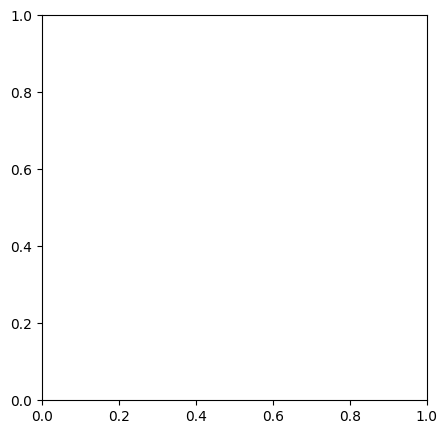

In [36]:
fig, ax = plt.subplots(figsize=(5, 5)) # set the size of the figure
# plot_tree(best_xgb_model, num_trees=6, ax=ax) # plot the tree on the axes
# plt.show() # show the plot

for i in range(5):
    plot_tree(best_xgb_model, ax=ax, num_trees=i)
    ax.set_title("Tree {}".format(i))
    fig.savefig("tree_{}.png".format(i))
    ax.clear()
